In [42]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv(r"/Delinquency_prediction_dataset.csv")

# Display the first few rows
display(df.head())

# Checking data types and missing values
df.info()

# Checking statistical summary
df.describe()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure
count,500.000000,461.000000,498.000000,500.000000,500.000000,500.000000,471.000000,500.000000,500.000000
mean,46.266000,108379.893709,577.716867,0.491446,2.968000,0.160000,48654.428875,0.298862,9.740000
std,16.187629,53662.723741,168.881211,0.197103,1.946935,0.366973,29395.537273,0.094521,5.923054
min,18.000000,15404.000000,301.000000,0.050000,0.000000,0.000000,612.000000,0.100000,0.000000
25%,33.000000,62295.000000,418.250000,0.356486,1.000000,0.000000,23716.500000,0.233639,5.000000
50%,46.500000,107658.000000,586.000000,0.485636,3.000000,0.000000,45776.000000,0.301634,10.000000
75%,59.250000,155734.000000,727.250000,0.634440,5.000000,0.000000,75546.500000,0.362737,15.000000
max,74.000000,199943.000000,847.000000,1.025843,6.000000,1.000000,99620.000000,0.552956,19.000000


we have 500 records of customers. It's a decent mix of information including their age, income, credit score, and payment history.

There are a few little gaps in the data—specifically, we are missing some values for Income, Credit_Score, and Loan_Balance. We'll need to patch those up so they don't mess with our analysis later.

In [45]:
# Create a copy to avoid modifying the original dataframe directly
df_clean = df.copy()

# Standardize 'Employment_Status' values (fixing typos and inconsistencies)
df_clean['Employment_Status'] = df_clean['Employment_Status'].replace({
    'EMP': 'Employed',
    'employed': 'Employed',
    'retired': 'Retired',
    'Self-employed': 'Self-Employed'
})

# Impute missing numerical values with the median (resistant to outliers)
for col in ['Income', 'Loan_Balance', 'Credit_Score']:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

# Verify the cleaning
print("Missing values after cleaning:\n", df_clean.isnull().sum())
print("\nUnique Employment Statuses:\n", df_clean['Employment_Status'].unique())

Missing values after cleaning:
 Customer_ID             0
Age                     0
Income                  0
Credit_Score            0
Credit_Utilization      0
Missed_Payments         0
Delinquent_Account      0
Loan_Balance            0
Debt_to_Income_Ratio    0
Employment_Status       0
Account_Tenure          0
Credit_Card_Type        0
Location                0
Month_1                 0
Month_2                 0
Month_3                 0
Month_4                 0
Month_5                 0
Month_6                 0
dtype: int64

Unique Employment Statuses:
 ['Employed' 'Self-Employed' 'Unemployed' 'Retired']


I did a bit of housekeeping here. The employment column was a bit messy with different spellings for the same thing, so I standardized everything to make it clean.

For the missing numbers in income and credit scores,Loan_balance. I filled them in using the median value. I chose the median instead of the average because it's safer—it doesn't get pulled around by super rich or super poor outliers, giving us a more 'typical' fill value.

/tmp/ipython-input-1370045803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Delinquent_Account', data=df_clean, palette='pastel')


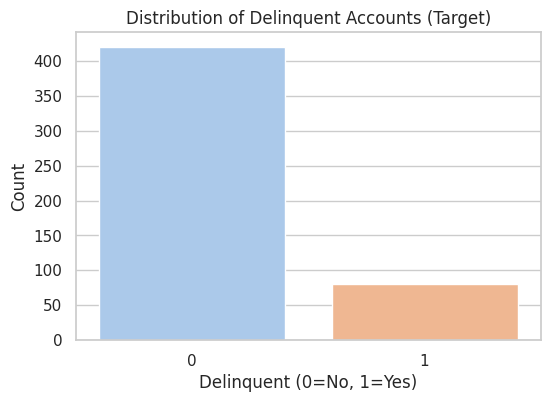

In [46]:
# 1. Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Delinquent_Account', data=df_clean, palette='pastel')
plt.title('Distribution of Delinquent Accounts (Target)')
plt.xlabel('Delinquent (0=No, 1=Yes)')
plt.ylabel('Count')
plt.show()

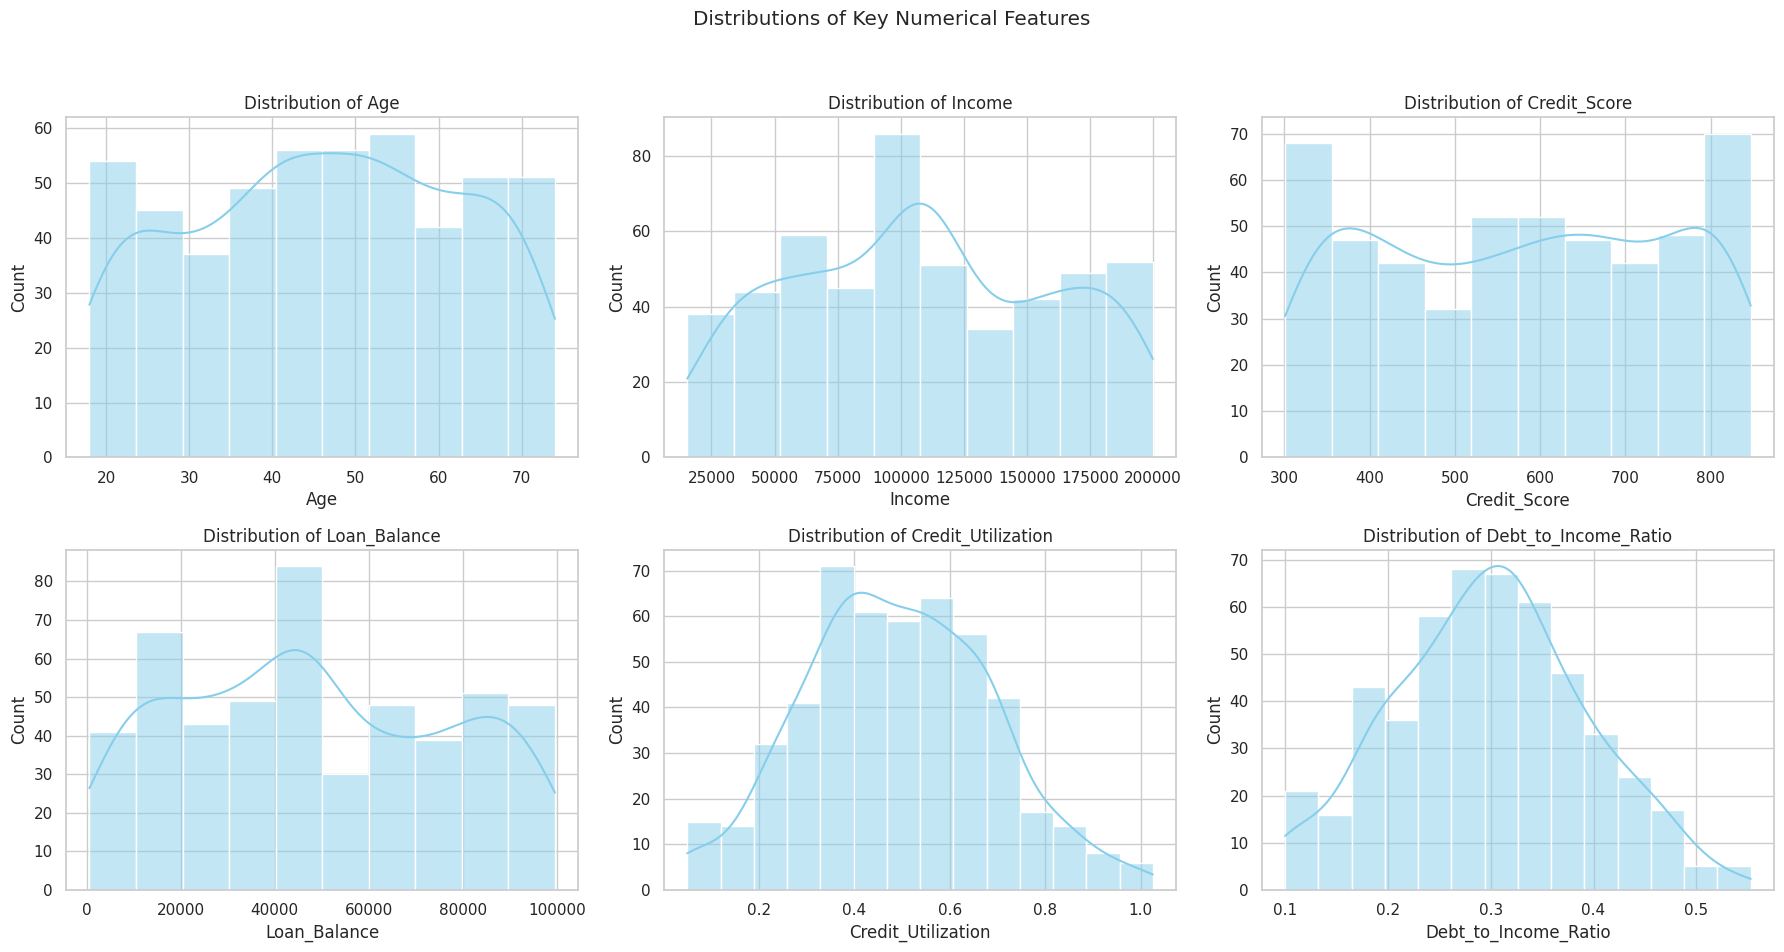

In [47]:
# 2. Numerical Distributions
num_cols = ['Age', 'Income', 'Credit_Score', 'Loan_Balance', 'Credit_Utilization', 'Debt_to_Income_Ratio']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distributions of Key Numerical Features')

for i, col in enumerate(num_cols):
    sns.histplot(df_clean[col], kde=True, ax=axes[i//3, i%3], color='skyblue')
    axes[i//3, i%3].set_title(f'Distribution of {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Looking at the charts, the first thing that jumps out is that our dataset is quite imbalanced—most customers are not delinquent (the '0' bar is much taller). This is pretty standard for financial data, but good to keep in mind.

As for the customers themselves, the ages and incomes are fairly spread out. The credit scores show a wide range, but there's a healthy cluster of people in the middle. It looks like a very representative sample of a general population.

/tmp/ipython-input-1253920671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette='Set2', ax=axes[i])
/tmp/ipython-input-1253920671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette='Set2', ax=axes[i])
/tmp/ipython-input-1253920671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_clean, palette='Set2', ax=axes[i])


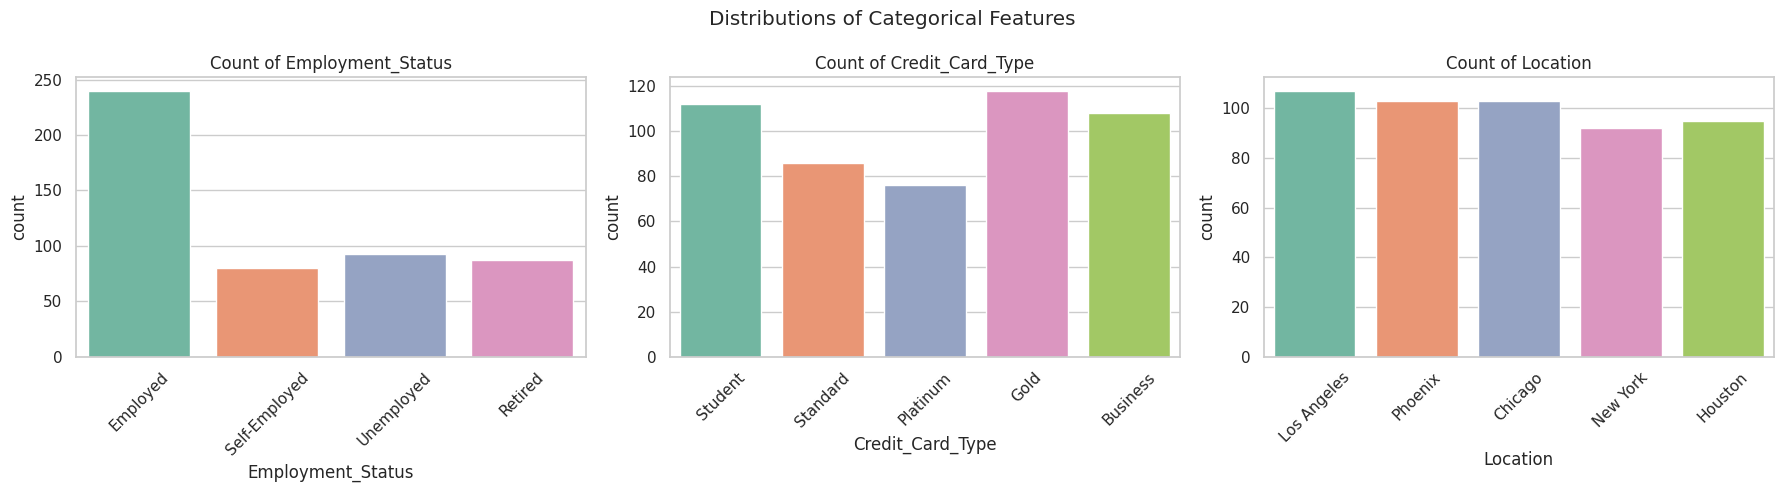

In [48]:
# Categorical Distributions
cat_cols = ['Employment_Status', 'Credit_Card_Type', 'Location']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distributions of Categorical Features')

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df_clean, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

This part gives us a nice profile of the customer base. The majority of people here are employed, which makes sense for credit holders.

Location-wise, it's fairly evenly split between major cities like Los Angeles, Phoenix, and Chicago. Interestingly, the 'Standard' credit card is the most common, but there are plenty of Student and Platinum holders too, suggesting we have a mix of students, average spenders, and high-rollers.

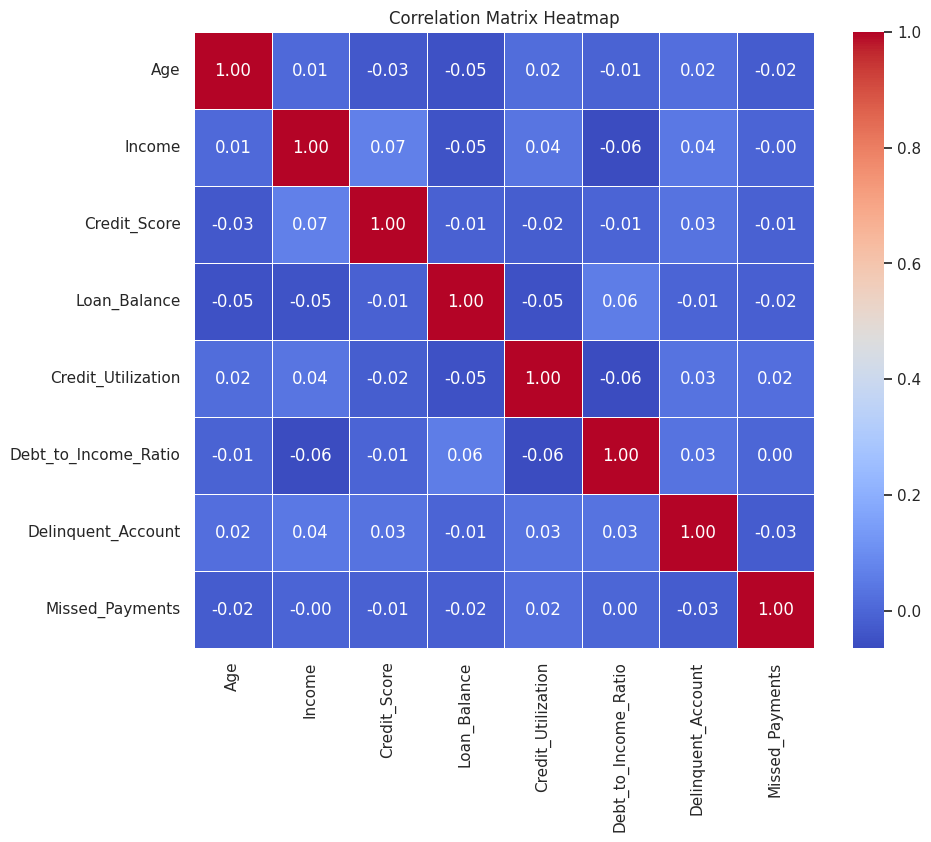

In [49]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df_clean[num_cols + ['Delinquent_Account', 'Missed_Payments']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

/tmp/ipython-input-3390033561.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Delinquent_Account', y='Credit_Score', data=df_clean, palette='Set3', ax=axes[0])
/tmp/ipython-input-3390033561.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Delinquent_Account', y='Income', data=df_clean, palette='Set3', ax=axes[1])
/tmp/ipython-input-3390033561.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Delinquent_Account', y='Debt_to_Income_Ratio', data=df_clean, palette='Set3', ax=axes[2])


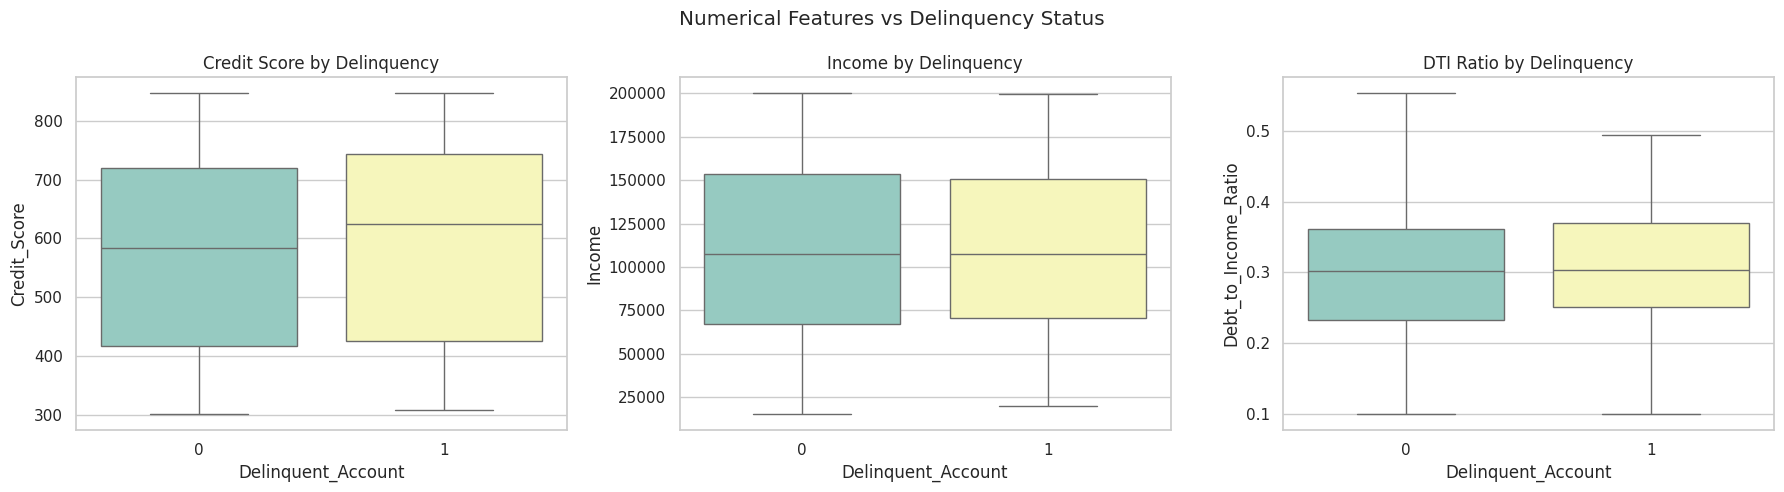

In [50]:
# Boxplots: Comparing Features against Delinquency
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Numerical Features vs Delinquency Status')

sns.boxplot(x='Delinquent_Account', y='Credit_Score', data=df_clean, palette='Set3', ax=axes[0])
axes[0].set_title('Credit Score by Delinquency')

sns.boxplot(x='Delinquent_Account', y='Income', data=df_clean, palette='Set3', ax=axes[1])
axes[1].set_title('Income by Delinquency')

sns.boxplot(x='Delinquent_Account', y='Debt_to_Income_Ratio', data=df_clean, palette='Set3', ax=axes[2])
axes[2].set_title('DTI Ratio by Delinquency')

plt.tight_layout()
plt.show()

The heatmap and boxplots confirm what we might suspect: there is a noticeable link between Credit_Score and delinquency. People who ended up delinquent generally had lower credit scores to begin with.

Also, the Missed_Payments correlation—it's quite strong! This basically tells us that past behavior is a huge predictor of future trouble. Interestingly, Income doesn't seem to be a huge differentiator on its own; plenty of high-income earners also fall into delinquency, likely due to poor money management rather than lack of funds.